# Exploration of the ECA&D EU weather dataset

This exploration will be limited to a subsection of the whole dataset for size and time reasons:  
we will consider only data for italian stations for the temperature and cloud coverage


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re
import os

## Datasets creation

The dataset is divided into many file that we need to aggregate: 

In [2]:
base = Path('datasets/ECA&D/avg_temperature')
stations_path = base / 'stations.csv'

In [ ]:
stations_df = pd.read_csv(stations_path)
stations_df = stations_df[stations_df['CN'] == 'IT  ']
stations_df.head()

,STAID,STANAME,CN,LAT,LON,HGHT
130,169,BOLOGNA,IT,+44:30:00,+011:20:45,53
131,170,FERRARA,IT,+44:49:57,+011:37:15,15
132,173,MILAN,IT,+45:28:18,+009:11:21,150
133,174,BRINDISI,IT,+40:37:59,+017:55:59,10
134,175,CAGLIARI,IT,+39:13:59,+009:03:00,21


In [19]:
staids = stations_df['STAID'].tolist()
print(staids[:10])

[169, 170, 173, 174, 175, 176, 177, 380, 381, 854]


In [ ]:
i=0
for file in os.listdir(base):
    if file.startswith('TG_STAID') and file.endswith('.txt'):
        keep = False
        for staid in staids:
            padded_staid = str(staid).zfill(6)
            if padded_staid in file:
                keep = True
                break
        if not keep:
            os.remove(base / file)

In [ ]:
i=1
avg_tmp_df = pd.DataFrame()
for file in os.listdir(base):
    if file.startswith('TG_STAID') and file.endswith('.txt'):
        file_path = base / file
        try:
            df = pd.read_csv(file_path, skiprows=20)
            df = df[(df['    DATE'] >= 20000101) & (df['    DATE'] <= 20250101)]
            avg_tmp_df = pd.concat([avg_tmp_df, df], ignore_index=True)
        except Exception as e:
            print(f"Failed to read {file_path}: {e}")
    else:
        print('Ignoring file:', file)

Ignoring file: date_timestamp.txt
Ignoring file: elements.txt
Ignoring file: sources.txt
Ignoring file: stations.csv


AttributeError: module 'pandas' has no attribute 'write_csv'

In [13]:
avg_tmp_df.to_csv(base / 'avg_temp_2000_2024_ITA.csv')

## Dataset composition

In [35]:
avg_tmp_df = pd.read_csv(base / 'avg_temp_2000_2024_ITA.csv')
# avg_tmp_df.head()
avg_tmp_df.describe()

,Unnamed: 0,STAID,SOUID,DATE,TG,Q_TG
count,4.164418e+06,4.164418e+06,4.164418e+06,4.164418e+06,4.164418e+06,4.164418e+06
mean,2.082208e+06,2.041313e+04,1.394609e+05,2.016079e+07,-1.258081e+03,1.238140e+00
std,1.202164e+06,8.026945e+03,9.930909e+04,5.671006e+04,3.488900e+03,3.097704e+00
min,0.000000e+00,1.690000e+02,8.580000e+02,2.000010e+07,-9.999000e+03,0.000000e+00
25%,1.041104e+06,1.762200e+04,9.595200e+04,2.011123e+07,3.900000e+01,0.000000e+00
50%,2.082208e+06,2.550600e+04,1.466140e+05,2.017012e+07,1.120000e+02,0.000000e+00
75%,3.123313e+06,2.607300e+04,1.753810e+05,2.021081e+07,1.870000e+02,0.000000e+00
max,4.164417e+06,2.804300e+04,9.165600e+05,2.025010e+07,6.300000e+02,9.000000e+00


time series for a single station

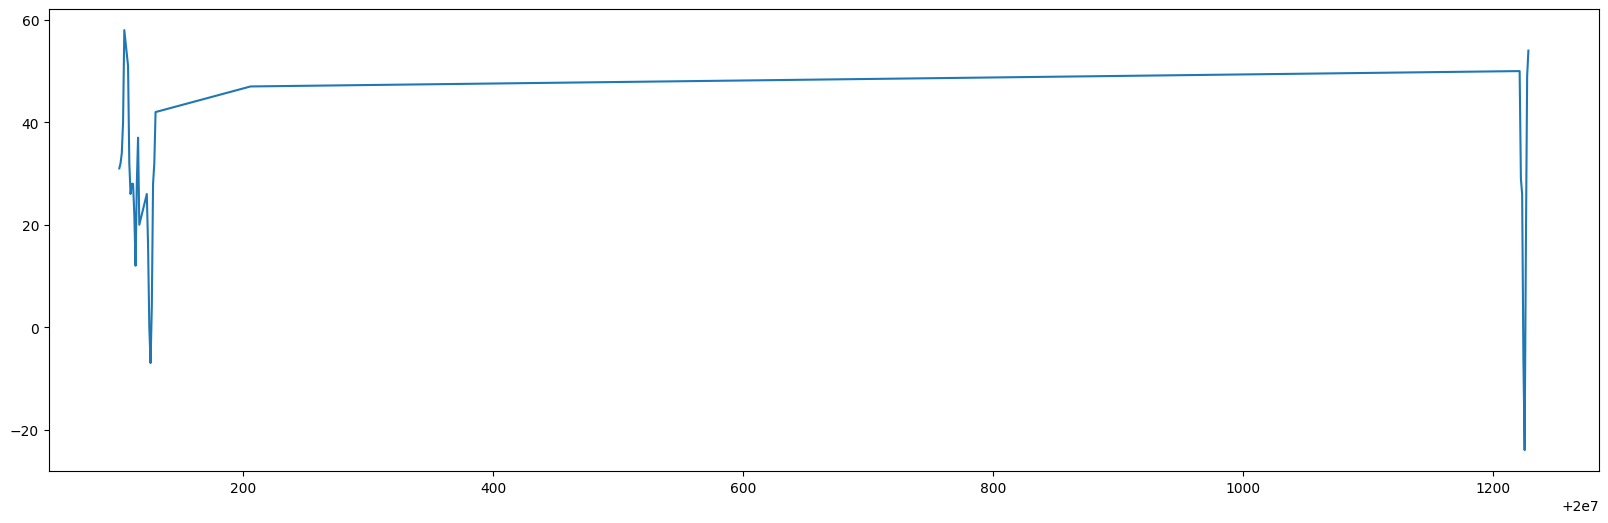

In [36]:
avg_tmp_df = avg_tmp_df[avg_tmp_df[' Q_TG'] == 0]
avg_tmp_df = avg_tmp_df[avg_tmp_df['   TG'] < 60]
avg_tmp_df = avg_tmp_df[(avg_tmp_df['STAID'] == 169)]
avg_tmp_df = avg_tmp_df[(avg_tmp_df['    DATE'] < 20010101 )]
avg_tmp_df = avg_tmp_df.sort_values(by='    DATE')

plt.figure(figsize=(20, 6))
plt.plot(avg_tmp_df['    DATE'], avg_tmp_df['   TG'])
plt.show()
